In [1]:
import numpy as np
import gym
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot
import pandas as pd

In [ ]:
pip install gym[toy_text]

In [184]:
#@title Hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 1
DISCOUNT = 0.9
STUDENT_NUM = 367

PROB = 0
ACTION = 1
STATE = 2
REWARD = 3

window_size = 50

In [5]:
#@title Environment
env = gym.make('Taxi-v3')
Initial_State = env.reset(seed = STUDENT_NUM)

## Agents

In [190]:
#@title Q-Learning Agent

class Q_Learning_Agent():

  def __init__(self,Enivronment,Repeats = REPS,episodes = EPISODES,Epsilon = EPSILON,Learning_rate = LEARNING_RATE,Discount = DISCOUNT):
    
    self.Enivronment = Enivronment
    self.Repeats = Repeats
    self.Episodes = episodes
    self.Epsilon = Epsilon 
    self.Learning_rate = Learning_rate
    self.Discount = Discount

    self.nA = self.Enivronment.action_space.n
    self.nS = self.Enivronment.observation_space.n
    self.Q_values = np.zeros((self.nS,self.nA))

  def choose_action(self,state):
    prob = np.random.uniform(0,1)
    if(prob < self.Epsilon):
      action = self.Enivronment.action_space.sample()
    else:
      action = np.argmax(self.Q_values[state,:])
    return action


  def update_Q(self,state,action,next_state,reward):
    self.Q_values[state,action] = self.Q_values[state,action] + self.Learning_rate*(reward + self.Discount*np.max(self.Q_values[next_state,:]) - self.Q_values[state,action]) 


  def Q_learning(self):

    rewards = np.zeros(self.Episodes)
    for current_episode in range(self.Episodes):

      state = self.Enivronment.reset(seed = STUDENT_NUM)
      finish = False
      episode_rewards = 0
      while(True):

        action = self.choose_action(state)

        next_state , reward , finish , possible_actions = self.Enivronment.step(action)

        self.update_Q(state,action,next_state,reward)

        state = next_state

        episode_rewards += reward

        if(finish == True): break

      self.Epsilon = np.exp(-0.01*current_episode)

      self.Learning_rate = np.exp(-0.01*current_episode)

      rewards[current_episode] = episode_rewards

    return rewards


  def Routing_with_Updated_Q_Values(self):

    state = self.Enivronment.reset(seed = STUDENT_NUM)
    finish = False
    actions = []
    while(True):

      action = np.argmax(self.Q_values[state,:])
      next_state , reward , finish , possible_actions = self.Enivronment.step(action)
      state = next_state
      if(finish == True): break
      actions.append(action)

    return actions

  def Q_Learning_algorithm(self):
    Average_reward = np.zeros(self.Episodes)
    for i in range(self.Repeats):
      self.Q_values = np.zeros((self.nS,self.nA))
      Average_reward = Average_reward + 1/self.Repeats * self.Q_learning()
    return Average_reward


In [ ]:
#@title Sarsa Agent

class Sarsa_Agent():

  def __init__(self,Enivronment,Repeats = REPS,episodes = EPISODES,Epsilon = EPSILON,Learning_rate = LEARNING_RATE,Discount = DISCOUNT):
        
    self.Enivronment = Enivronment
    self.Repeats = Repeats
    self.Episodes = episodes
    self.Epsilon = Epsilon 
    self.Learning_rate = Learning_rate
    self.Discount = Discount

    self.nA = self.Enivronment.action_space.n
    self.nS = self.Enivronment.observation_space.n
    self.Q_values = np.zeros((self.nS,self.nA))

  def choose_action(self,state):
    prob = np.random.uniform(0,1)
    if(prob < self.Epsilon):
      action = self.Enivronment.action_space.sample()
    else:
      action = np.argmax(self.Q_values[state,:])
    return action

  def update_Q(self,state,action,next_state,reward,next_action):
    self.Q_values[state,action] = self.Q_values[state,action] + self.Learning_rate*(reward + self.Discount * self.Q_values[next_state,next_action] - self.Q_values[state,action])

  def Sarsa(self):
    rewards = np.zeros(self.Episodes)
    for current_episode in range(self.Episodes):

      state = self.Enivronment.reset(seed = STUDENT_NUM)
      finish = False
      episode_rewards = 0
      action = self.choose_action(state)
      while(True):

        next_state , reward , finish , possible_actions = self.Enivronment.step(action)

        next_action = self.choose_action(next_state)

        self.update_Q(state,action,next_state,reward,next_action)

        state = next_state

        action = next_action

        episode_rewards += reward

        if(finish == True): break

      self.Epsilon = np.exp(-0.01*current_episode)

      rewards[current_episode] = episode_rewards

    return rewards

  def Routing_with_Updated_Q_Values(self):

    state = self.Enivronment.reset(seed = STUDENT_NUM)
    finish = False
    actions = []
    while(True):

      action = np.argmax(self.Q_values[state,:])
      next_state , reward , finish , possible_actions = self.Enivronment.step(action)
      state = next_state
      if(finish == True): break
      actions.append(action)

    return actions

  def Sarsa_algorithm(self):
    Average_reward = np.zeros(self.Episodes)
    for i in range(self.Repeats):
      self.Q_values = np.zeros((self.nS,self.nA))
      Average_reward = Average_reward + 1/self.Repeats * self.Sarsa()
    return Average_reward

In [ ]:
#@title 1-Step Tree Backup Agent

class OneStepTreeBackup_Agent():

  def __init__(self,Enivronment,Repeats = REPS,episodes = EPISODES,Epsilon = EPSILON,Learning_rate = LEARNING_RATE,Discount = DISCOUNT):
    
    self.Enivronment = Enivronment
    self.Repeats = Repeats
    self.Episodes = episodes
    self.Epsilon = Epsilon 
    self.Learning_rate = Learning_rate
    self.Discount = Discount

    self.nA = self.Enivronment.action_space.n
    self.nS = self.Enivronment.observation_space.n
    self.Q_values = np.zeros((self.nS,self.nA))

  def epsilon_greedy_policy(self, state, epsilon):
    epsilon_policy = np.ones(self.nA, dtype=float) * epsilon / self.nA
    best_action = np.argmax(self.Q_values[state,:])
    epsilon_policy[best_action] += (1.0 - epsilon)
    return epsilon_policy

  def update_Q(self,state,action,next_state,reward,next_state_probs):
    self.Q_values[state,action] = self.Q_values[state,action] + self.Learning_rate*(reward + self.Discount*np.sum(next_state_probs*self.Q_values[next_state]) - self.Q_values[state,action]) 


  def OneStepTreeBackup(self):

    rewards = np.zeros(self.Episodes)
    for current_episode in range(self.Episodes):

      state = self.Enivronment.reset(seed = STUDENT_NUM)
      finish = False
      episode_rewards = 0
      while(True):

        probs = self.epsilon_greedy_policy(state, self.Epsilon)
        action = np.random.choice(np.arange(len(probs)), p = probs)

        next_state , reward , finish , possible_actions = self.Enivronment.step(action)

        next_state_probs = self.epsilon_greedy_policy(next_state, self.Epsilon)

        self.update_Q(state,action,next_state,reward,next_state_probs)

        state = next_state

        episode_rewards += reward

        if(finish == True): break

      self.Epsilon = np.exp(-0.01*current_episode)

      rewards[current_episode] = episode_rewards

    return rewards


  def Routing_with_Updated_Q_Values(self):

    state = self.Enivronment.reset(seed = STUDENT_NUM)
    finish = False
    actions = []
    while(True):

      action = np.argmax(self.Q_values[state,:])
      next_state , reward , finish , possible_actions = self.Enivronment.step(action)
      state = next_state
      if(finish == True): break
      actions.append(action)

    return actions

  def OneStepTreeBackup_algorithm(self):
    Average_reward = np.zeros(self.Episodes)
    for i in range(self.Repeats):
      Average_reward = Average_reward + 1/self.Repeats * self.OneStepTreeBackup()
    return Average_reward


In [107]:
#@title 2-Step Tree Backup Agent

class TwoStepTreeBackup_Agent():

  def __init__(self,Enivronment,Repeats = REPS,episodes = EPISODES,Epsilon = EPSILON,Learning_rate = LEARNING_RATE,Discount = DISCOUNT):
    
    self.Enivronment = Enivronment
    self.Repeats = Repeats
    self.Episodes = episodes
    self.Epsilon = Epsilon 
    self.Learning_rate = Learning_rate
    self.Discount = Discount

    self.nA = self.Enivronment.action_space.n
    self.nS = self.Enivronment.observation_space.n
    self.Q_values = np.zeros((self.nS,self.nA))

  def epsilon_greedy_policy(self, state, epsilon):
    epsilon_policy = np.ones(self.nA, dtype=float) * epsilon / self.nA
    best_action = np.argmax(self.Q_values[state,:])
    epsilon_policy[best_action] += (1.0 - epsilon)
    return epsilon_policy

  
  def TwoStepTreeBackup(self):

    rewards = np.zeros(self.Episodes)
    for current_episode in range(self.Episodes):

      state = self.Enivronment.reset(seed = STUDENT_NUM)
      finish = False
      episode_rewards = 0
      while(True):

        probs = self.epsilon_greedy_policy(state, self.Epsilon)
        action = np.random.choice(np.arange(len(probs)), p = probs)
        next_state , reward , finish , possible_actions = self.Enivronment.step(action)

        episode_rewards += reward

        next_state_probs = self.epsilon_greedy_policy(next_state, self.Epsilon)
        next_action = np.random.choice(np.arange(len(next_state_probs)), p =next_state_probs )
        next_next_state, next_reward, finish, _ = env.step(next_action)

        episode_rewards += next_reward

        next_next_state_probs = self.epsilon_greedy_policy(next_next_state,self.Epsilon)
        next_next_action = np.random.choice(np.arange(len(next_next_state_probs)), p = next_next_state_probs)
        next_next_next_state, next_next_reward, finish, _ = env.step(next_next_action)
        episode_rewards += next_next_reward


        V = np.sum(next_state_probs * self.Q_values[next_state])

        one_step = reward + self.Discount * V

        next_V = np.sum(next_next_state_probs * self.Q_values[next_next_state])        	
        Delta = next_reward + self.Discount * next_V - self.Q_values[next_state][next_action]
        next_action_selection_probability = np.max(next_state_probs)

        two_step = self.Discount * next_action_selection_probability * Delta
        
        td_target = one_step + two_step

        td_delta = td_target - self.Q_values[state][action]

        self.Q_values[state][action] += self.Learning_rate * td_delta

        if(finish == True): break

        state = next_state

      self.Epsilon = np.exp(-0.01*current_episode)

      rewards[current_episode] = episode_rewards

    return rewards


  def Routing_with_Updated_Q_Values(self):

    state = self.Enivronment.reset(seed = STUDENT_NUM)
    finish = False
    actions = []
    while(True):

      action = np.argmax(self.Q_values[state,:])
      next_state , reward , finish , possible_actions = self.Enivronment.step(action)
      state = next_state
      if(finish == True): break
      actions.append(action)

    return actions

  def TwoStepTreeBackup_algorithm(self):
    Average_reward = np.zeros(self.Episodes)
    for i in range(self.Repeats):
      Average_reward = Average_reward + 1/self.Repeats * self.TwoStepTreeBackup()
    return Average_reward


In [ ]:
#@title 3-Step Tree Backup Agent

class ThreeStepTreeBackup_Agent():

  def __init__(self,Enivronment,Repeats = REPS,episodes = EPISODES,Epsilon = EPSILON,Learning_rate = LEARNING_RATE,Discount = DISCOUNT):
    
    self.Enivronment = Enivronment
    self.Repeats = Repeats
    self.Episodes = episodes
    self.Epsilon = Epsilon 
    self.Learning_rate = Learning_rate
    self.Discount = Discount

    self.nA = self.Enivronment.action_space.n
    self.nS = self.Enivronment.observation_space.n
    self.Q_values = np.zeros((self.nS,self.nA))

  def epsilon_greedy_policy(self, state, epsilon):
    epsilon_policy = np.ones(self.nA, dtype=float) * epsilon / self.nA
    best_action = np.argmax(self.Q_values[state,:])
    epsilon_policy[best_action] += (1.0 - epsilon)
    return epsilon_policy

  
  def ThreeStepTreeBackup(self):

    rewards = np.zeros(self.Episodes)
    for current_episode in range(self.Episodes):

      state = self.Enivronment.reset(seed = STUDENT_NUM)
      finish = False
      episode_rewards = 0
      while(True):

        probs = self.epsilon_greedy_policy(state, self.Epsilon)
        action = np.random.choice(np.arange(len(probs)), p = probs)
        next_state , reward , finish , possible_actions = self.Enivronment.step(action)

        episode_rewards += reward

        next_state_probs = self.epsilon_greedy_policy(next_state, self.Epsilon)
        next_action = np.random.choice(np.arange(len(next_state_probs)), p =next_state_probs )
        next_next_state, next_reward, finish, _ = env.step(next_action)

        episode_rewards += next_reward

        next_next_state_probs = self.epsilon_greedy_policy(next_next_state,self.Epsilon)
        next_next_action = np.random.choice(np.arange(len(next_next_state_probs)), p = next_next_state_probs)
        next_next_next_state, next_next_reward, done, _ = env.step(next_next_action)

        episode_rewards += next_next_reward

        next_next_next_state_probs  = self.epsilon_greedy_policy(next_next_next_state,self.Epsilon)
        next_next_next_action = np.random.choice(np.arange(len(next_next_next_state_probs)), p = next_next_next_state_probs)


        V = np.sum(next_state_probs * self.Q_values[next_state])

        one_step = reward + self.Discount * V

        next_V = np.sum(next_next_state_probs * self.Q_values[next_next_state])

        Delta_1 = next_reward + self.Discount * next_V - self.Q_values[next_state][next_action]
        next_action_selection_probability = np.max(next_state_probs)
        	
        two_step = self.Discount * next_action_selection_probability * Delta_1

        next_next_V = np.sum(next_next_next_state_probs * self.Q_values[next_next_next_state])
        Delta_2 = next_next_reward + self.Discount * next_next_V - self.Q_values[next_next_state][next_next_action]
        next_next_action_selection_probability = np.max(next_next_state_probs)

        three_step = self.Discount * next_action_selection_probability * self.Discount * next_next_action_selection_probability * Delta_2

        td_target = one_step + two_step + three_step 

        td_delta = td_target - self.Q_values[state][action]
        self.Q_values[state][action] += self.Learning_rate * td_delta


        if(finish == True): break

        state = next_state

      self.Epsilon = np.exp(-0.01*current_episode)

      rewards[current_episode] = episode_rewards

    return rewards


  def Routing_with_Updated_Q_Values(self):

    state = self.Enivronment.reset(seed = STUDENT_NUM)
    finish = False
    actions = []
    while(True):

      action = np.argmax(self.Q_values[state,:])
      next_state , reward , finish , possible_actions = self.Enivronment.step(action)
      state = next_state
      if(finish == True): break
      actions.append(action)

    return actions

  def ThreeStepTreeBackup_algorithm(self):
    Average_reward = np.zeros(self.Episodes)
    for i in range(self.Repeats):
      Average_reward = Average_reward + 1/self.Repeats * self.ThreeStepTreeBackup()
    return Average_reward


In [145]:
#@title n-Step Tree Backup Agent

class nStepTreeBackup_Agent():

  def __init__(self,Enivronment,n,Repeats = REPS,episodes = EPISODES,Epsilon = EPSILON,Learning_rate = LEARNING_RATE,Discount = DISCOUNT):
    
    self.Enivronment = Enivronment
    self.n = n
    self.Repeats = Repeats
    self.Episodes = episodes
    self.Epsilon = Epsilon 
    self.Learning_rate = Learning_rate
    self.Discount = Discount

    self.nA = self.Enivronment.action_space.n
    self.nS = self.Enivronment.observation_space.n
    self.Q_values = np.zeros((self.nS,self.nA))

  def epsilon_greedy_policy(self, state, epsilon):
    epsilon_policy = np.ones(self.nA, dtype=float) * epsilon / self.nA
    best_action = np.argmax(self.Q_values[state,:])
    epsilon_policy[best_action] += (1.0 - epsilon)
    return epsilon_policy

  def calculate_state_actions_value(self,state,type,action):
    value = 0
    probs = self.epsilon_greedy_policy(state,self.Epsilon)
    if(type == 1):
      for a in range(self.nA):
        value += probs[a] * self.Q_values[state][a]
      
    if(type == 2):
      for a in range(self.nA):
        if (a != action):
          value += probs[a] * self.Q_values[state][a]

    return value

  def nStepTreeBackup(self):

    rewards = np.zeros(self.Episodes)
    for current_episode in range(self.Episodes):
      episode_rewards = 0
      episode = {'States':[] , 'Actions':[] , 'Rewards':[]}
      state = self.Enivronment.reset(seed = STUDENT_NUM)
      probs = self.epsilon_greedy_policy(state,self.Epsilon)
      action = np.random.choice(np.arange(len(probs)),p=probs)
      episode['States'].append(state)
      episode["Actions"].append(action)

      T = 10**10
      t = 0
      while(True):

        if(t<T):
          next_state,reward,finish,_ = self.Enivronment.step(episode["Actions"][t])
          episode['States'].append(next_state)
          episode['Rewards'].append(reward)
          if(finish == True): 
            T = t + 1
          else:
            probs = self.epsilon_greedy_policy(episode['States'][t+1],self.Epsilon)
            next_action = np.random.choice(np.arange(len(probs)),p=probs)
            episode["Actions"].append(next_action)

        tau = t + 1 - self.n
        if(tau >= 0):
          if(t+1 >= T):
            G = episode["Rewards"][T-1]
          else:
            G =  episode["Rewards"][t] + self.Discount * self.calculate_state_actions_value(episode['States'][t+1],1,0)
          for k in range(min( T - 1 , t), tau, -1):
            G += episode["Rewards"][k-1] + self.Discount * self.calculate_state_actions_value(episode['States'][k],2,episode["Actions"][k]) + self.Discount * self.epsilon_greedy_policy(episode['States'][k],self.Epsilon)[episode["Actions"][k]]*G
          
          self.Q_values[episode['States'][tau]][episode["Actions"][tau]] = self.Q_values[episode['States'][tau]][episode["Actions"][tau]] + self.Learning_rate * (G - self.Q_values[episode['States'][tau]][episode["Actions"][tau]])


        episode_rewards = np.sum(episode["Rewards"])
        if tau == T-1 :break
        else : t+=1
      self.Epsilon = np.exp(-0.001*current_episode)
      rewards[current_episode] = episode_rewards

    return rewards


  def Routing_with_Updated_Q_Values(self):

    state = self.Enivronment.reset(seed = STUDENT_NUM)
    finish = False
    actions = []
    while(True):

      action = np.argmax(self.Q_values[state,:])
      next_state , reward , finish , possible_actions = self.Enivronment.step(action)
      state = next_state
      if(finish == True): break
      actions.append(action)
    return actions

  def nStepTreeBackup_algorithm(self):
    Average_reward = np.zeros(self.Episodes)
    for i in range(self.Repeats):
      self.Q_values = np.zeros((self.nS,self.nA))
      Average_reward = Average_reward + 1/self.Repeats * self.nStepTreeBackup()
    return Average_reward



In [167]:
#@title Off-policy MC control

class offpolicyMC_Agent():

  def __init__(self,Enivronment,Repeats = REPS,episodes = EPISODES,Epsilon = EPSILON,Learning_rate = LEARNING_RATE,Discount = DISCOUNT):
    
    self.Enivronment = Enivronment
    self.Repeats = Repeats
    self.Episodes = episodes
    self.Epsilon = Epsilon
    self.Learning_rate = Learning_rate
    self.Discount = Discount

    self.nA = self.Enivronment.action_space.n
    self.nS = self.Enivronment.observation_space.n
    self.Q_values = np.zeros((self.nS,self.nA))
    self.C_values = np.zeros((self.nS,self.nA))
    self.policy = np.zeros((self.nS,self.nA))

  def epsilon_greedy_policy(self,state):
    epsilon_policy = np.ones(self.nA, dtype=float) * self.Epsilon / self.nA
    best_action = np.argmax(self.Q_values[state,:])
    epsilon_policy[best_action] += (1.0 - self.Epsilon)
    return epsilon_policy

  def greedy_policy(self,state):
    greedy_policy = np.zeros(self.nA, dtype=float)
    best_action = np.argmax(self.Q_values[state,:])
    greedy_policy[best_action] = 1.0
    return greedy_policy

  def offpolicyMC(self):
    rewards = np.zeros(self.Episodes)
    for current_episode in range(self.Episodes):
      episode_rewards = 0
      episode = []
      state = self.Enivronment.reset(seed = STUDENT_NUM)
      for t in range(10000):
        probs = self.epsilon_greedy_policy(state)
        action = np.random.choice(np.arange(len(probs)),p=probs)
        next_state,reward,finish,_ = self.Enivronment.step(action)
        episode.append((state,action,reward))
        episode_rewards += reward
        if(finish == True): break
        state = next_state

      G = 0
      W = 1
      for t in range(len(episode))[::-1]:
        state,action,reward = episode[t]
        G = reward + self.Discount * G
        self.C_values[state][action] = self.C_values[state][action] + W
        self.Q_values[state][action] = self.Q_values[state][action] + (W/self.C_values[state][action])*(G-self.Q_values[state][action])
        if(action != np.argmax(self.greedy_policy(state))):break
        W = W / self.epsilon_greedy_policy(state)[action]
      # self.Epsilon = np.exp(-0.001*current_episode)
      rewards[current_episode] = episode_rewards

    return rewards

  def Routing_with_Updated_Q_Values(self):

    state = self.Enivronment.reset(seed = STUDENT_NUM)
    finish = False
    actions = []
    while(True):

      action = np.argmax(self.Q_values[state,:])
      next_state , reward , finish , possible_actions = self.Enivronment.step(action)
      state = next_state
      if(finish == True): break
      actions.append(action)

    return actions


  def offpolicyMC_algorithm(self):
    Average_reward = np.zeros(self.Episodes)
    for i in range(self.Repeats):
      self.Q_values = np.zeros((self.nS,self.nA))
      self.C_values = np.zeros((self.nS,self.nA))
      self.policy = np.zeros((self.nS,self.nA))
      Average_reward = Average_reward + 1/self.Repeats * self.offpolicyMC()
    return Average_reward

## Testing the Q-Learning Agent

### Learning Rate = 0.1

In [186]:
q1 = Q_Learning_Agent(env)

In [187]:
Average_reward_q1 = q1.Q_Learning_algorithm()

Text(0, 0.5, 'reward')

<Figure size 432x288 with 0 Axes>

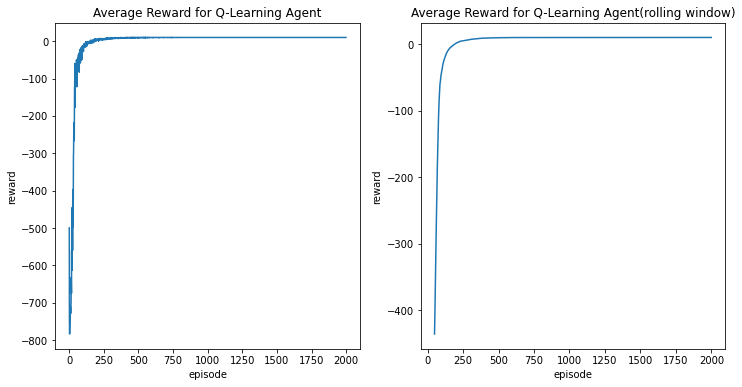

In [188]:
smoothed_Average_reward_q1 = pd.Series(Average_reward_q1).rolling(window_size , min_periods = window_size).mean()
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(Average_reward_q1)
plt.title("Average Reward for Q-Learning Agent")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(122)
plt.plot(smoothed_Average_reward_q1)
plt.title("Average Reward for Q-Learning Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")

In [71]:
print(f'Q-Learning(Learning rate = 0.1) Average reward in last 100 episodes: {np.round(np.mean(Average_reward_q1[1900:-1]),3)}')

Q-Learning(Learning rate = 0.1) Average reward in last 100 episodes: 10.0


In [72]:
print('actions to reach the goal: ')
q1.Routing_with_Updated_Q_Values()

actions to reach the goal: 


[1, 4, 0, 3, 0, 3, 3, 3, 0, 0]

### Decaying Learning

In [191]:
q = Q_Learning_Agent(env,20,2000,1,1)

In [192]:
Average_reward_q = q.Q_Learning_algorithm()

Text(0, 0.5, 'reward')

<Figure size 432x288 with 0 Axes>

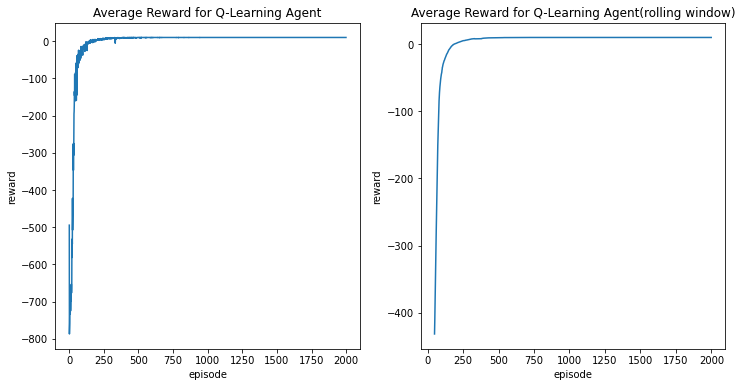

In [193]:
smoothed_Average_reward_q = pd.Series(Average_reward_q).rolling(window_size , min_periods = window_size).mean()
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(Average_reward_q)
plt.title("Average Reward for Q-Learning Agent")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(122)
plt.plot(smoothed_Average_reward_q)
plt.title("Average Reward for Q-Learning Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")

In [194]:
print(f'Decaying learning rate Q-Learning Average reward in last 100 episodes: {np.round(np.mean(Average_reward_q[1900:-1]),3)}')

Decaying learning rate Q-Learning Average reward in last 100 episodes: 10.0


In [195]:
print('actions to reach the goal: ')
q.Routing_with_Updated_Q_Values()

actions to reach the goal: 


[1, 4, 3, 3, 0, 0, 3, 3, 0, 0]

<Figure size 432x288 with 0 Axes>

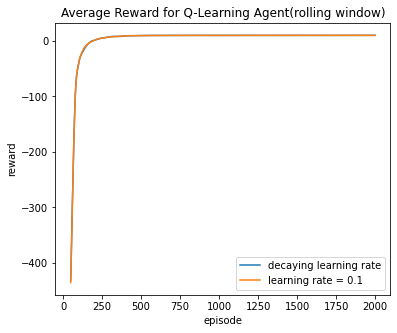

In [196]:
plt.figure(1)
plt.figure(figsize=(6, 5))
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(smoothed_Average_reward_q,label = 'decaying learning rate')
plt.plot(smoothed_Average_reward_q1,label = 'learning rate = 0.1')
plt.title("Average Reward for Q-Learning Agent(rolling window)")
plt.legend()

/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


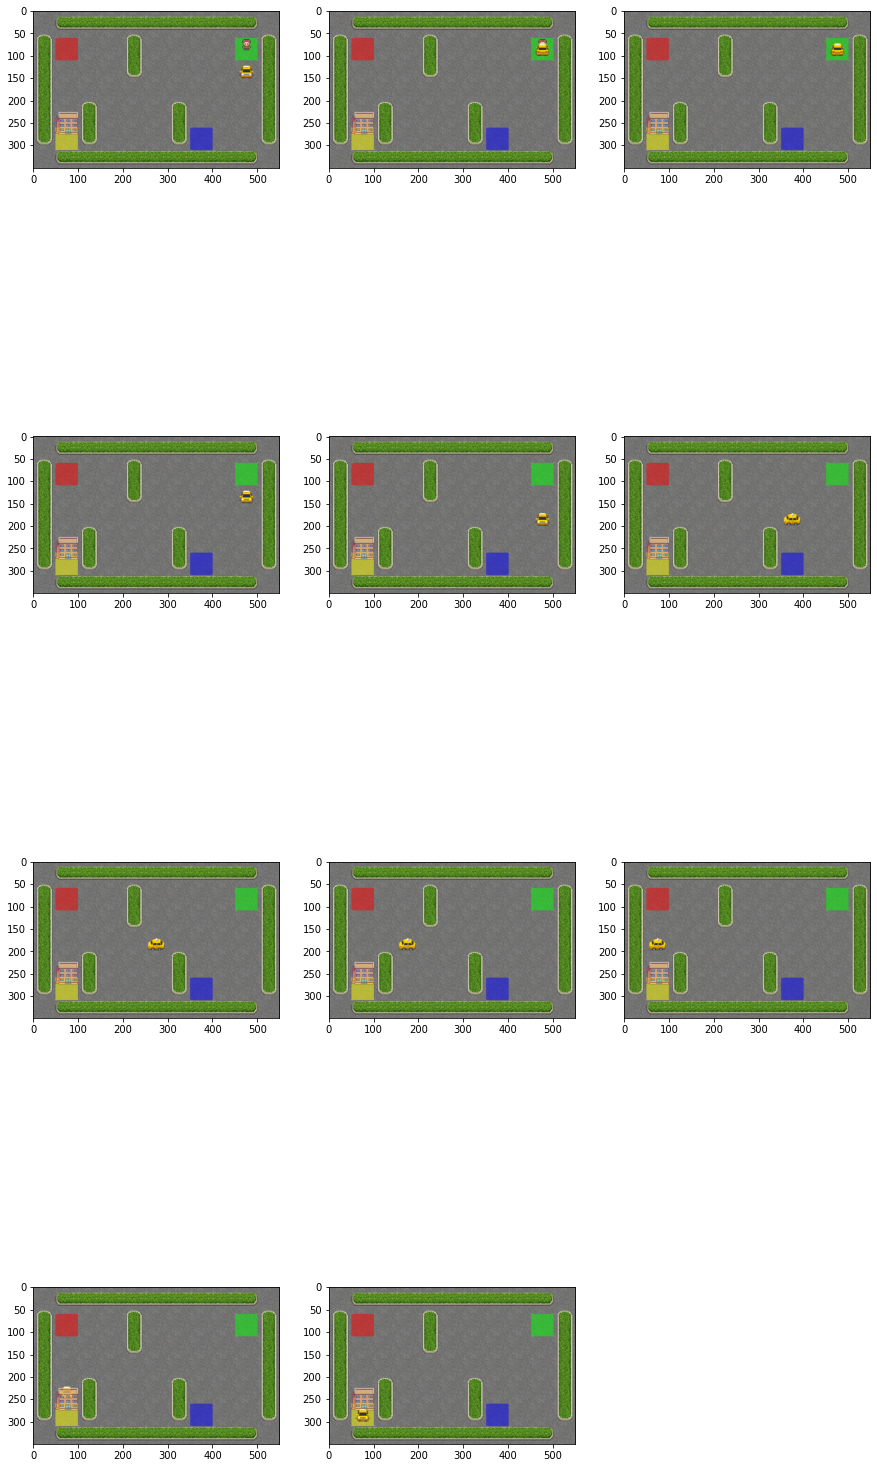

In [81]:
#@title Rendering the Optimum Route
optimum_route = q.Routing_with_Updated_Q_Values()
No_moves = len(q.Routing_with_Updated_Q_Values())
env.reset(seed = STUDENT_NUM)
fig = plt.figure(figsize = (15,30))
plt.subplot(4,3,1)
plt.imshow(env.render(mode='rgb_array'))
for i in range(No_moves):
  env.step(optimum_route[i])
  plt.subplot(4,3,i+2)
  plt.imshow(env.render(mode='rgb_array'))
  
  

## Testing the Sarsa Agent

In [89]:
s = Sarsa_Agent(env)

In [90]:
Average_Reward_s = s.Sarsa_algorithm()

Text(0, 0.5, 'reward')

<Figure size 432x288 with 0 Axes>

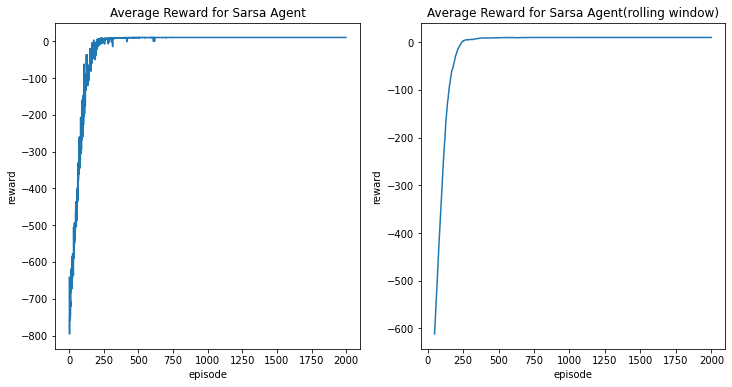

In [91]:
smoothed_Average_reward_s = pd.Series(Average_Reward_s).rolling(window_size , min_periods = window_size).mean()
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(Average_Reward_s)
plt.title("Average Reward for Sarsa Agent")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(122)
plt.plot(smoothed_Average_reward_s)
plt.title("Average Reward for Sarsa Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")

In [92]:
print(f'Sarsa Average reward in last 100 episodes: {np.round(np.mean(Average_Reward_s[1900:-1]),3)}')

Sarsa Average reward in last 100 episodes: 10.0


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


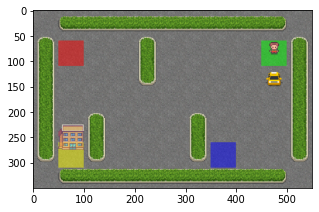

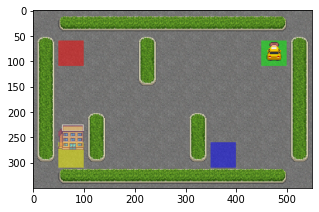

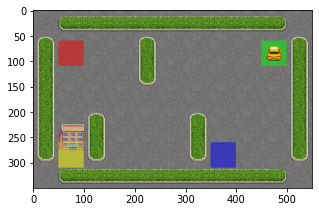

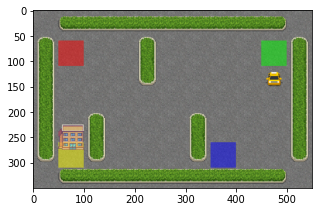

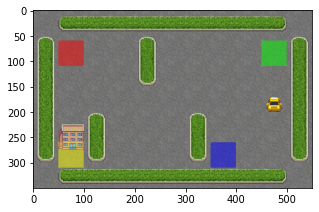

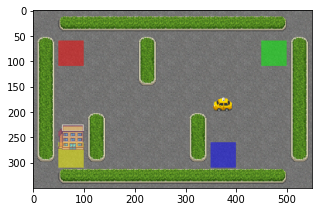

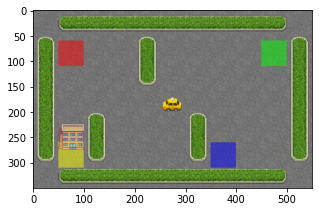

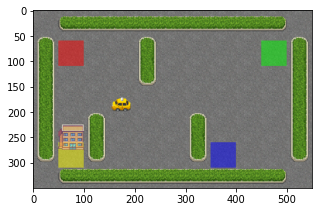

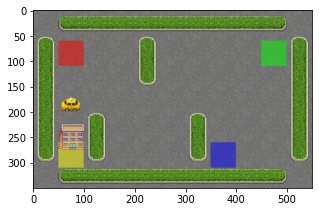

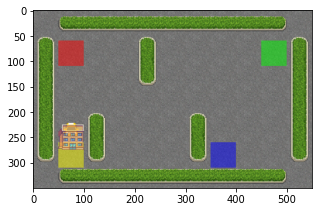

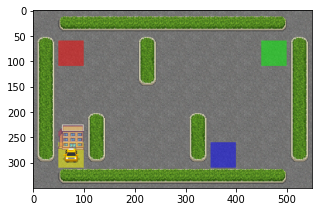

In [93]:
#@title Rendering the Optimum Route
optimum_route = s.Routing_with_Updated_Q_Values()
No_moves = len(s.Routing_with_Updated_Q_Values())
env.reset(seed = STUDENT_NUM)
fig = plt.figure(figsize = (5,5))
plt.imshow(env.render(mode='rgb_array'))
for i in range(No_moves):
  env.step(optimum_route[i])
  fig = plt.figure(figsize = (5,5))
  plt.imshow(env.render(mode='rgb_array'))

## Testing the Tree Backup Agent

### 1-step Tree Backup

In [94]:
tb1 = nStepTreeBackup_Agent(env,1)

In [95]:
Average_reward_tb1 = tb1.nStepTreeBackup_algorithm()

Text(0, 0.5, 'reward')

<Figure size 432x288 with 0 Axes>

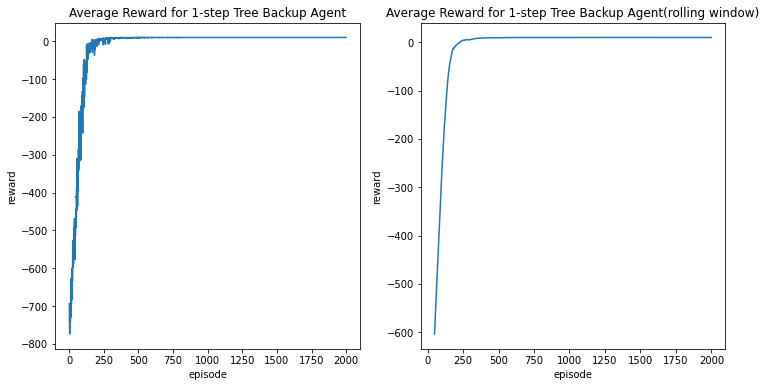

In [96]:
smoothed_Average_reward_tb1 = pd.Series(Average_reward_tb1).rolling(window_size , min_periods = window_size).mean()
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(Average_reward_tb1)
plt.title("Average Reward for 1-step Tree Backup Agent")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(122)
plt.plot(smoothed_Average_reward_tb1)
plt.title("Average Reward for 1-step Tree Backup Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")

In [97]:
print(f'1-Step Tree Backup Average reward in last 100 episodes: {np.round(np.mean(Average_reward_tb1[1900:-1]),3)}')

1-Step Tree Backup Average reward in last 100 episodes: 10.0


In [98]:
tb1.Routing_with_Updated_Q_Values()

[1, 4, 0, 0, 3, 3, 3, 3, 0, 0]

### 2-Step Tree Backup

In [146]:
tb2 = nStepTreeBackup_Agent(env,2)

In [147]:
Average_reward_tb2 = tb2.nStepTreeBackup_algorithm()

Text(0, 0.5, 'reward')

<Figure size 432x288 with 0 Axes>

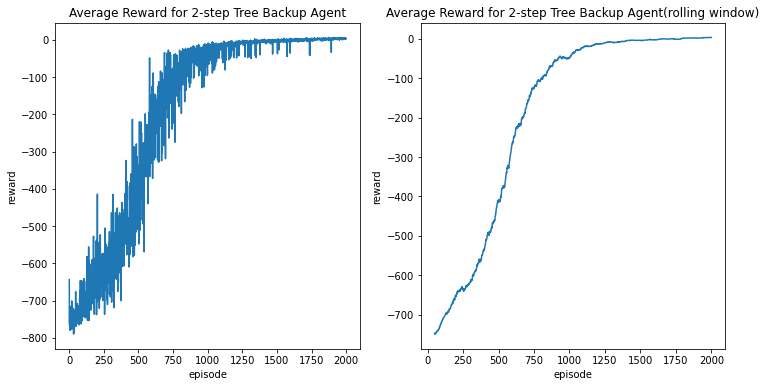

In [148]:
smoothed_Average_reward_tb2 = pd.Series(Average_reward_tb2).rolling(window_size , min_periods = window_size).mean()
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(Average_reward_tb2)
plt.title("Average Reward for 2-step Tree Backup Agent")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(122)
plt.plot(smoothed_Average_reward_tb2)
plt.title("Average Reward for 2-step Tree Backup Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")

In [152]:
print(f'2-Step Tree Backup Average reward in last 100 episodes: {np.round(np.mean(Average_reward_tb2[1900:-1]),3)}')

2-Step Tree Backup Average reward in last 100 episodes: 3.146


In [153]:
tb2.Q_values

array([[       0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ],
       [  -82228.4783532 ,   -87600.39622829,   -84415.65875085,
          -86793.94266186,   -95780.25827977,   -82362.19797472],
       ...,
       [       0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ],
       [-2712180.68875221, -2664857.29134193, -2767792.40152367,
        -2799505.88802699, -2967973.12673798, -2666307.92134932],
       [       0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ]])

In [154]:
print('actions to reach the goal: ')
tb2.Routing_with_Updated_Q_Values()

actions to reach the goal: 


[1, 4, 0, 3, 3, 0, 3, 3, 0, 0]

### 3-step Tree Backup

In [136]:
tb3 = nStepTreeBackup_Agent(env,3)

In [137]:
Average_reward_tb3 = tb3.nStepTreeBackup_algorithm()

Text(0, 0.5, 'reward')

<Figure size 432x288 with 0 Axes>

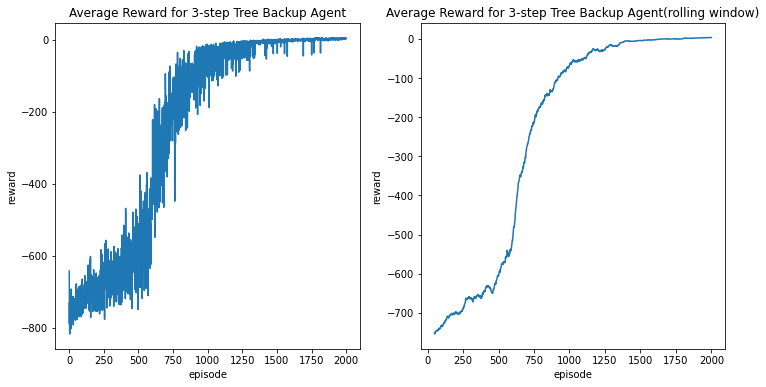

In [138]:
smoothed_Average_reward_tb3 = pd.Series(Average_reward_tb3).rolling(window_size , min_periods = window_size).mean()
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(Average_reward_tb3)
plt.title("Average Reward for 3-step Tree Backup Agent")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(122)
plt.plot(smoothed_Average_reward_tb3)
plt.title("Average Reward for 3-step Tree Backup Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")

In [139]:
print(f'3-Step Tree Backup Average reward in last 100 episodes: {np.round(np.mean(Average_reward_tb3[1900:-1]),3)}')

3-Step Tree Backup Average reward in last 100 episodes: 3.119


In [140]:
print('actions to reach the goal: ')
tb3.Routing_with_Updated_Q_Values()

actions to reach the goal: 


[1, 4, 3, 3, 0, 0, 3, 3, 0, 0]

In [ ]:
#@title Rendering the Optimum Route
optimum_route = tb3.Routing_with_Updated_Q_Values()
No_moves = len(tb3.Routing_with_Updated_Q_Values())
env.reset(seed = STUDENT_NUM)
fig = plt.figure(figsize = (5,5))
plt.imshow(env.render(mode='rgb_array'))
for i in range(No_moves):
  env.step(optimum_route[i])
  fig = plt.figure(figsize = (5,5))
  plt.imshow(env.render(mode='rgb_array'))

### Comparing different n's

<Figure size 432x288 with 0 Axes>

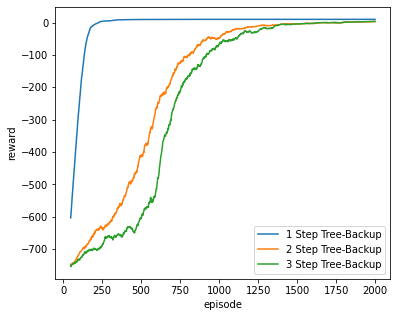

In [155]:
plt.figure(1)
plt.figure(figsize=(6, 5))
plt.plot(smoothed_Average_reward_tb1,label = '1 Step Tree-Backup')
plt.plot(smoothed_Average_reward_tb2,label = '2 Step Tree-Backup')
plt.plot(smoothed_Average_reward_tb3,label = '3 Step Tree-Backup')
plt.xlabel("episode")
plt.ylabel('reward')
plt.legend()

## Testing Off-policy MC

### Decaying Epsilon

In [160]:
opMC = offpolicyMC_Agent(env)

In [161]:
Average_reward_MC = opMC.offpolicyMC_algorithm()

Text(0, 0.5, 'reward')

<Figure size 432x288 with 0 Axes>

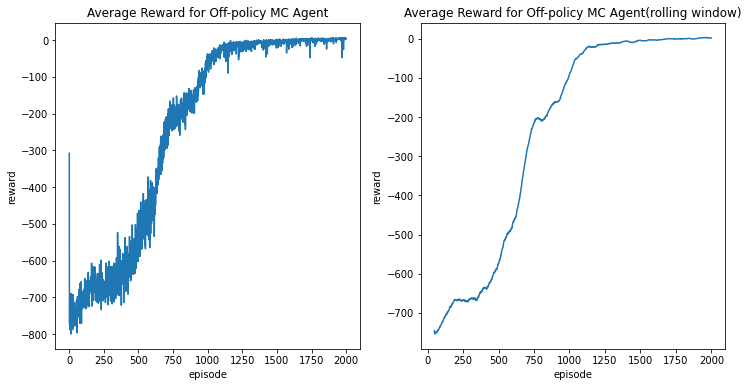

In [164]:
smoothed_Average_reward_MC = pd.Series(Average_reward_MC).rolling(window_size , min_periods = window_size).mean()
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(Average_reward_MC)
plt.title("Average Reward for Off-policy MC Agent")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(122)
plt.plot(smoothed_Average_reward_MC)
plt.title("Average Reward for Off-policy MC Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")

In [165]:
print(f'Decaying epsilon Off-policy MC Average reward in last 100 episodes: {np.round(np.mean(Average_reward_MC[1900:-1]),3)}')

Decaying epsilon Off-policy MC Average reward in last 100 episodes: 2.171


### Fixed Epsilon

In [168]:
print('actions to reach the goal: ')
opMC.Routing_with_Updated_Q_Values()

actions to reach the goal: 


[1, 4, 3, 3, 0, 0, 3, 3, 0, 0]

In [175]:
opMC1 = offpolicyMC_Agent(env)

In [176]:
Average_reward_MC1 = opMC1.offpolicyMC_algorithm()

Text(0, 0.5, 'reward')

<Figure size 432x288 with 0 Axes>

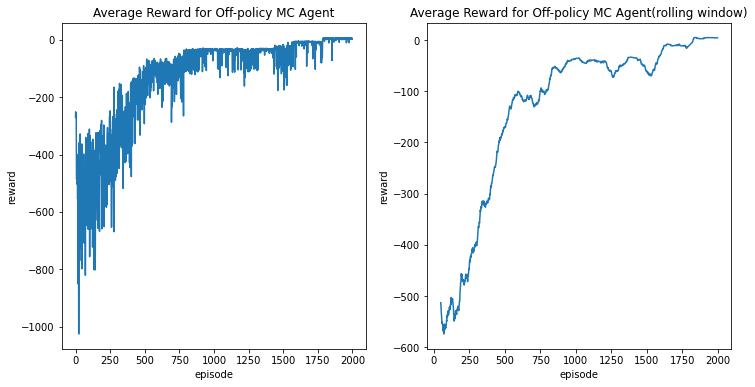

In [177]:
smoothed_Average_reward_MC1 = pd.Series(Average_reward_MC1).rolling(window_size , min_periods = window_size).mean()
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(Average_reward_MC1)
plt.title("Average Reward for Off-policy MC Agent")
plt.xlabel("episode")
plt.ylabel("reward")
plt.subplot(122)
plt.plot(smoothed_Average_reward_MC1)
plt.title("Average Reward for Off-policy MC Agent(rolling window)")
plt.xlabel("episode")
plt.ylabel("reward")

In [178]:
print(f'fixed epsilon Off-policy MC Average reward in last 100 episodes: {np.round(np.mean(Average_reward_MC1[1900:-1]),3)}')

fixed epsilon Off-policy MC Average reward in last 100 episodes: 4.411


In [179]:
print('actions to reach the goal: ')
opMC.Routing_with_Updated_Q_Values()

actions to reach the goal: 


[1, 4, 3, 3, 0, 0, 3, 3, 0, 0]

### Comparison

<Figure size 432x288 with 0 Axes>

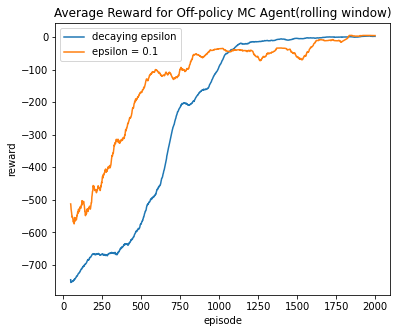

In [180]:
plt.figure(1)
plt.figure(figsize=(6, 5))
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(smoothed_Average_reward_MC,label = 'decaying epsilon')
plt.plot(smoothed_Average_reward_MC1,label = 'epsilon = 0.1')
plt.title("Average Reward for Off-policy MC Agent(rolling window)")
plt.legend()

## Comparing different methods

<Figure size 432x288 with 0 Axes>

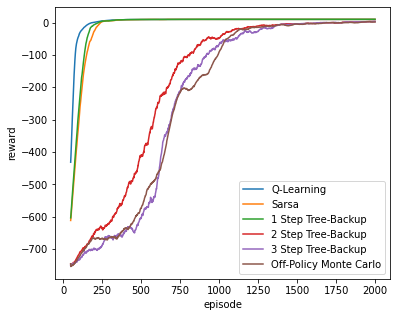

In [197]:
plt.figure(1)
plt.figure(figsize=(6, 5))
plt.plot(smoothed_Average_reward_q,label = 'Q-Learning')
plt.plot(smoothed_Average_reward_s,label = 'Sarsa')
plt.plot(smoothed_Average_reward_tb1,label = '1 Step Tree-Backup')
plt.plot(smoothed_Average_reward_tb2,label = '2 Step Tree-Backup')
plt.plot(smoothed_Average_reward_tb3,label = '3 Step Tree-Backup')
plt.plot(smoothed_Average_reward_MC,label = 'Off-Policy Monte Carlo')
plt.xlabel("episode")
plt.ylabel('reward')
plt.legend()

<Figure size 432x288 with 0 Axes>

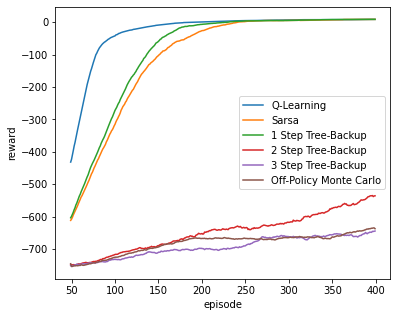

In [199]:
plt.figure(2)
plt.figure(figsize=(6, 5))
plt.plot(smoothed_Average_reward_q[:400],label = 'Q-Learning')
plt.plot(smoothed_Average_reward_s[:400],label = 'Sarsa')
plt.plot(smoothed_Average_reward_tb1[:400],label = '1 Step Tree-Backup')
plt.plot(smoothed_Average_reward_tb2[:400],label = '2 Step Tree-Backup')
plt.plot(smoothed_Average_reward_tb3[:400],label = '3 Step Tree-Backup')
plt.plot(smoothed_Average_reward_MC[:400],label = 'Off-Policy Monte Carlo')
plt.xlabel("episode")
plt.ylabel('reward')
plt.legend()